In [2]:
#import winsound as sd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.offsetbox import AnchoredOffsetbox
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar

import string

import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform

import pickle
import os

In [3]:
# load
cd = os.getcwd()
path = os.path.dirname(cd)

with open(path+'//Data_final16_v2.pkl', 'rb') as file:
    Data = pickle.load(file)   
    Datalen = pickle.load(file)    
    # Granule cell firing rate for data(812개)
    DG_FR = pickle.load(file)
    
    # 각 data의 DG output size(길이)
    DGlen_list = pickle.load(file)
    # 적당한 길이에 따라 index로 분류(453개)
    DGlen_idx = pickle.load(file)
    DGlen_idx_excluded = pickle.load(file)
    
    # 각 pair에 대한 input/output overlap값과 index
    OverI = pickle.load(file)
    OverO = pickle.load(file)
    Pair_idx = pickle.load(file)
    
    # 길이로 분류한 pair에 대한 input/output overlap값과 index
    OverI_v2 = pickle.load(file)
    OverO_v2 = pickle.load(file)
    Pair_idx_v2 = pickle.load(file)
    
with open(path+'//Data_final16_v2-CA3.pkl', 'rb') as file:
    # 453개의 data에 해당하는 input vector, DG vector, DG vector size, 
    Filt_idata = pickle.load(file)
    Filt_gdata = pickle.load(file)
    Filt_glen = pickle.load(file)
    F_DataLen = pickle.load(file)
    
    # CA3 vector index, CA3i vector index
    Af_py = pickle.load(file)
    Af_in = pickle.load(file)
    
    # 뭐였더라
    In_py_list = pickle.load(file)
    In_in_list = pickle.load(file)

In [4]:
def choice_neurons(layer, N):
    n_index = []
    num = random.randrange(0,layer)
    #N_R = np.random.randint(1, N)
    for n in range(N):
        while num in n_index:
            num = random.randrange(0,layer)
        n_index.append(num)
    n_index.sort()
    return n_index

In [5]:
final_list = [249, 423, 80, 422, 228, 219, 517, 111, 346, 509]

In [6]:
def plot_vlines(ax, data, title, N_layer, color, size, ticks):
    for neuron_idx, spike_time in data:
        engram_id = 0       
        ax.vlines(spike_time, neuron_idx - size, neuron_idx + size, colors=color)
    ax.set_ylabel(title)
    ax.yaxis.set_label_coords(-0.05, 0.5)
    ax.set_xlim([0,2500])
    ax.set_yticks(ticks)
    ax.set_ylim([0,N_layer])
    ax.grid(False)

In [7]:
DG_idx_set = set()
for i, comp in enumerate(final_list):
    DG_idx_set |= set(np.where(Filt_gdata[:,comp])[0])
print(len(DG_idx_set))

15


In [8]:
CA3_idx_set = set()
for i, comp in enumerate(final_list):
    CA3_idx_set |= set(Af_py[comp])
print(len(CA3_idx_set))

104


In [9]:
with open('Spikes_encoding.pkl', 'rb') as file:
    network = pickle.load(file)
    FT = pickle.load(file)
    Voltage = pickle.load(file)

In [9]:
# Firing time layer 별로 분류
FT_rh = []
for N in range(9):
    FT_rh_temp = FT[N][0]
    for n in range(9):
        FT_rh_temp = np.concatenate((FT_rh_temp, FT[N][n+1]), axis=1)
    FT_rh.append(FT_rh_temp)

In [10]:
# Input / output at encoding
In_FT = FT_rh[0]
In_FT_list = []
for i in range(FT_rh[0].shape[0]):
    temp = np.where(In_FT[i,:])[0]
    for j, comp in enumerate(temp):
        In_FT_list.append([i,comp])
        
Out_FT = FT_rh[1]
Out_FT_list = []
for i in range(FT_rh[1].shape[0]):
    temp = np.where(Out_FT[i,:])[0]
    for j, comp in enumerate(temp):
        Out_FT_list.append([i,comp])

In [11]:
# DG at encoding
DGH_FT = FT_rh[2]
DGH_FT_list = []
for i in range(FT_rh[2].shape[0]):
    temp = np.where(DGH_FT[i,:])[0]
    for j, comp in enumerate(temp):
        DGH_FT_list.append([i,comp])

DGM_FT = FT_rh[3]
DGM_FT_list = []
for i in range(FT_rh[3].shape[0]):
    temp = np.where(DGM_FT[i,:])[0]
    for j, comp in enumerate(temp):
        DGM_FT_list.append([i,comp])
        
# DGM filtered        
DGM_FT_Flist = []
DGM_idx_set = choice_neurons(100, 50)
for i, comp in enumerate(DGM_idx_set):
    temp = np.where(DGM_FT[comp,:])[0]
    for j, comp2 in enumerate(temp):
        DGM_FT_Flist.append([i,comp2])
        
DGB_FT = FT_rh[4]
DGB_FT_list = []
for i in range(FT_rh[4].shape[0]):
    temp = np.where(DGB_FT[i,:])[0]
    for j, comp in enumerate(temp):
        DGB_FT_list.append([i,comp])
        
# DGB filtered        
DGB_FT_Flist = []
DGB_idx_set = choice_neurons(400, 50)
for i, comp in enumerate(DGB_idx_set):
    temp = np.where(DGB_FT[comp,:])[0]
    for j, comp2 in enumerate(temp):
        DGB_FT_Flist.append([i,comp2])
        
DG_FT = FT_rh[5]
DG_FT_list = []
for i in range(FT_rh[5].shape[0]):
    temp = np.where(DG_FT[i,:])[0]
    for j, comp in enumerate(temp):
        DG_FT_list.append([i,comp])
        
# DG filtered        
DG_FT_Flist = []
for i, comp in enumerate(DG_idx_set):
    temp = np.where(DG_FT[comp,:])[0]
    for j, comp2 in enumerate(temp):
        DG_FT_Flist.append([i,comp2])

In [12]:
# CA at encoding
CA3_FT = FT_rh[6]
CA3_FT_list = []
for i in range(FT_rh[6].shape[0]):
    temp = np.where(CA3_FT[i,:])[0]
    for j, comp in enumerate(temp):
        CA3_FT_list.append([i,comp])

CA3_FT_Flist = []
for i, comp in enumerate(CA3_idx_set):
    temp = np.where(CA3_FT[comp,:])[0]
    for j, comp2 in enumerate(temp):
        CA3_FT_Flist.append([i,comp2])
        
CA3i_FT = FT_rh[7]
CA3i_FT_list = []
for i in range(FT_rh[7].shape[0]):
    temp = np.where(CA3i_FT[i,:])[0]
    for j, comp in enumerate(temp):
        CA3i_FT_list.append([i,comp])

CA1_FT = FT_rh[8]
CA1_FT_list = []
for i in range(FT_rh[8].shape[0]):
    temp = np.where(CA1_FT[i,:])[0]
    for j, comp in enumerate(temp):
        CA1_FT_list.append([i,comp])

CA3_idx_set = set()
for i, comp in enumerate(final_list):
    CA3_idx_set |= set(Af_py[comp])
print(len(CA3_idx_set))

CA3_FT_engram = []
CA3_FT_idx = []
# comp : 선별된 CA3 idx
# i : 선별된 CA3 새 idx
# temp : 각 idx가 발화한 시간 리스트 / comp2 : 각 idx가 발화한 시간
for i, comp in enumerate(CA3_idx_set):
    temp = np.where(CA3_FT[comp,:])[0]
    for j, comp2 in enumerate(temp):
        CA3_FT_engram.append([i,comp2])
        CA3_FT_idx.append([i,comp])

In [13]:
# Create a color palette for engrams using Seaborn
palette = sns.color_palette("muted", 1)

# Setting the plot style using Seaborn
sns.set(style="whitegrid")

window = 120 # ms
FR_matrix = np.zeros((len(final_list),2400))
        
#for i, comp in enumerate(CA3_FT_Flist):
#    CA3_FT_Flist[i] = [comp[0],comp[1]-125]
for n in range(2400):
    for t in range(2400):
        for i, comp in enumerate(final_list):
            if CA3_FT[n,t] !=0 and n in Af_py[comp]:
                for T in range(2400):                    
                    if T <= t < T+window:
                        FR_matrix[i,T] +=1

for i, comp in enumerate(final_list):
    FR_matrix[i,:] = (FR_matrix[i,:]/(0.001*window))/len(Af_py[comp])

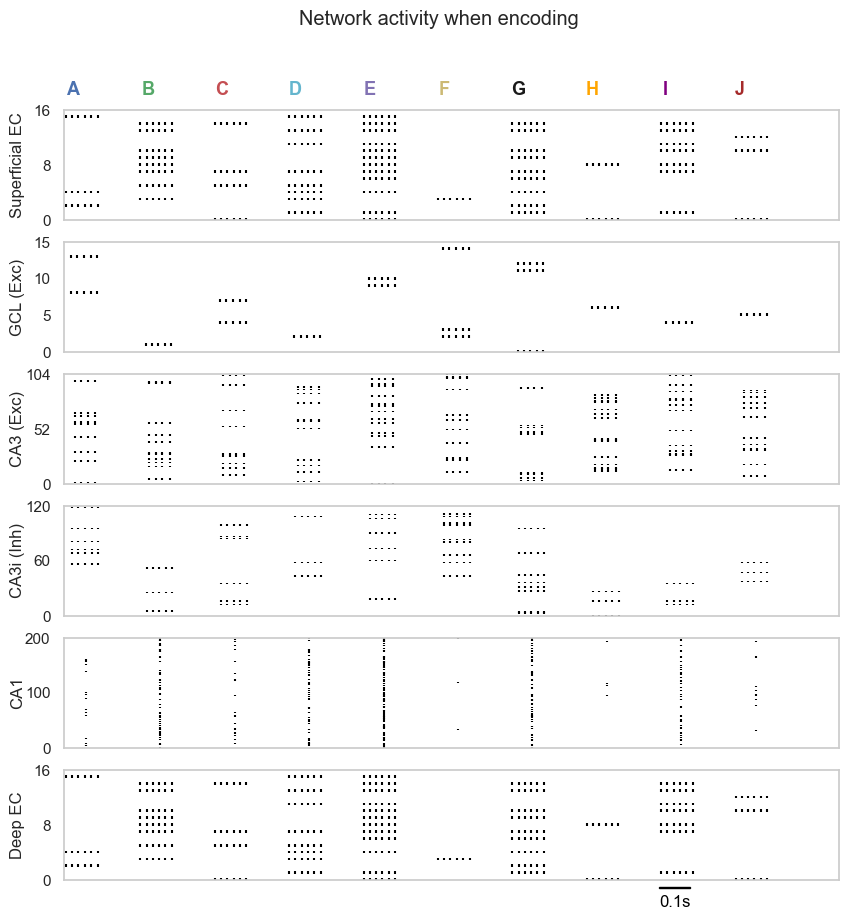

In [14]:
# Plotting
fig, axs = plt.subplots(6, 1, figsize=(10, 10), sharex=True)
fig.suptitle('Network activity when encoding')

# Adding text annotations for A and B inputs
labels = list(string.ascii_uppercase)[:10]
color_map = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']
for n in range(10):
    fig.text(0.135+0.074*n, 0.9, labels[n], color=color_map[n], ha='center', va='center', fontsize=13, fontweight='bold')

plot_vlines(axs[0], In_FT_list, 'Superficial EC',16, 'black', 0.2, [0,8,16])
plot_vlines(axs[1], DG_FT_Flist, 'GCL (Exc)', len(DG_idx_set), 'black', 0.2, [0,5,10,15])
plot_vlines(axs[2], CA3_FT_Flist, 'CA3 (Exc)', len(CA3_idx_set), 'black', 0.8, [0,52,104])
plot_vlines(axs[3], CA3i_FT_list, 'CA3i (Inh)', 120, 'black', 0.8, [0,60,120])
plot_vlines(axs[4], CA1_FT_list, 'CA1', 200, 'black', 0.8, [0,100,200])
plot_vlines(axs[5], Out_FT_list, 'Deep EC', 16, 'black', 0.2, [0,8,16])

scalebar = AnchoredSizeBar(axs[-1].transData,
                           100, '0.1s', 'lower right', pad=0.1, sep=5,
                           color='black', frameon=False, bbox_to_anchor=(0.8125,-0.3), bbox_transform=axs[-1].transAxes, size_vertical=0.1)
axs[-1].add_artist(scalebar)

# x = np.array(range(0,2400))
# for n in range(10):
#     axs[6].plot(x, FR_matrix[n,:], color=color_map[n])
# axs[6].set_ylabel('CA3 activity (Hz)')
# axs[6].set_yticks([0,40,80])
# axs[6].grid(False)
plt.gca().axes.xaxis.set_visible(False)
plt.savefig('Spikes figure at encoding_F.pdf', bbox_inches='tight')
plt.show()

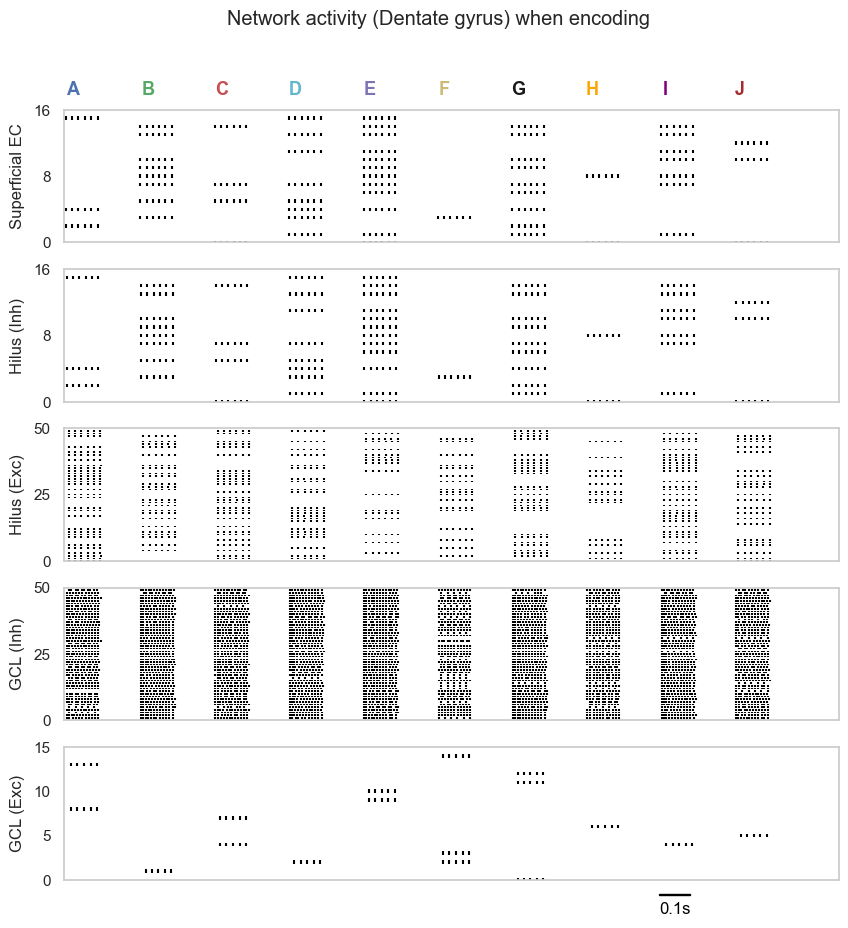

In [15]:
# Plotting
fig, axs = plt.subplots(5, 1, figsize=(10, 10), sharex=True)
fig.suptitle('Network activity (Dentate gyrus) when encoding')

# Adding text annotations for A and B inputs
labels = list(string.ascii_uppercase)[:10]
color_map = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']
for n in range(10):
    fig.text(0.135+0.074*n, 0.9, labels[n], color=color_map[n], ha='center', va='center', fontsize=13, fontweight='bold')

plot_vlines(axs[0], In_FT_list, 'Superficial EC',16, 'black', 0.2, [0,8,16])
plot_vlines(axs[1], DGH_FT_list, 'Hilus (Inh)', 16, 'black', 0.2, [0,8,16])
plot_vlines(axs[2], DGM_FT_Flist, 'Hilus (Exc)', 50, 'black', 0.3, [0,25,50])
plot_vlines(axs[3], DGB_FT_Flist, 'GCL (Inh)', 50, 'black', 0.3, [0,25,50])
plot_vlines(axs[4], DG_FT_Flist, 'GCL (Exc)', len(DG_idx_set), 'black', 0.2, [0,5,10,15])

scalebar = AnchoredSizeBar(axs[-1].transData,
                           100, '0.1s', 'lower right', pad=0.1, sep=5,
                           color='black', frameon=False, bbox_to_anchor=(0.8125,-0.3), bbox_transform=axs[-1].transAxes, size_vertical=0.1)
axs[-1].add_artist(scalebar)

plt.xlabel('Time(ms)')
plt.gca().axes.xaxis.set_visible(False)
plt.savefig('Spikes figure at encoding-DG.pdf', bbox_inches='tight')
plt.show()

In [16]:
with open('Spikes_retrieval.pkl', 'rb') as file:
    network = pickle.load(file)
    FT = pickle.load(file)
    Voltage = pickle.load(file)

In [17]:
FT_rh = []
for N in range(9):
    FT_rh_temp = FT[N][0]
    for n in range(9):
        FT_rh_temp = np.concatenate((FT_rh_temp, FT[N][n+1]), axis=1)
    FT_rh.append(FT_rh_temp)
    
for N in range(9):
    FT_rh[N] = FT_rh[N][:,120:]

In [18]:
# Input / output at retrieval
In_FT = FT_rh[0]
In_FT_list = []
for i in range(FT_rh[0].shape[0]):
    temp = np.where(In_FT[i,:])[0]
    for j, comp in enumerate(temp):
        In_FT_list.append([i,comp])
        
Out_FT = FT_rh[1]
Out_FT_list = []
for i in range(FT_rh[1].shape[0]):
    temp = np.where(Out_FT[i,:])[0]
    for j, comp in enumerate(temp):
        Out_FT_list.append([i,comp])

In [19]:
# DG at retrieval
DGH_FT = FT_rh[2]
DGH_FT_list = []
for i in range(FT_rh[2].shape[0]):
    temp = np.where(DGH_FT[i,:])[0]
    for j, comp in enumerate(temp):
        DGH_FT_list.append([i,comp])

DGM_FT = FT_rh[3]
DGM_FT_list = []
for i in range(FT_rh[3].shape[0]):
    temp = np.where(DGM_FT[i,:])[0]
    for j, comp in enumerate(temp):
        DGM_FT_list.append([i,comp])

DGB_FT = FT_rh[4]
DGB_FT_list = []
for i in range(FT_rh[4].shape[0]):
    temp = np.where(DGB_FT[i,:])[0]
    for j, comp in enumerate(temp):
        DGB_FT_list.append([i,comp])
        
DG_FT = FT_rh[5]
DG_FT_list = []
for i in range(FT_rh[5].shape[0]):
    temp = np.where(DG_FT[i,:])[0]
    for j, comp in enumerate(temp):
        DG_FT_list.append([i,comp])
        
# DG filtered        
DG_FT_Flist = []
for i, comp in enumerate(DG_idx_set):
    temp = np.where(DG_FT[comp,:])[0]
    for j, comp2 in enumerate(temp):
        DG_FT_Flist.append([i,comp2])

In [20]:
# CA at retrieval
CA3_FT = FT_rh[6]
CA3_FT_list = []
for i in range(FT_rh[6].shape[0]):
    temp = np.where(CA3_FT[i,:])[0]
    for j, comp in enumerate(temp):
        CA3_FT_list.append([i,comp])

CA3_FT_Flist = []
for i, comp in enumerate(CA3_idx_set):
    temp = np.where(CA3_FT[comp,:])[0]
    for j, comp2 in enumerate(temp):
        CA3_FT_Flist.append([i,comp2])
        
CA3i_FT = FT_rh[7]
CA3i_FT_list = []
for i in range(FT_rh[7].shape[0]):
    temp = np.where(CA3i_FT[i,:])[0]
    for j, comp in enumerate(temp):
        CA3i_FT_list.append([i,comp])

CA1_FT = FT_rh[8]
CA1_FT_list = []
for i in range(FT_rh[8].shape[0]):
    temp = np.where(CA1_FT[i,:])[0]
    for j, comp in enumerate(temp):
        CA1_FT_list.append([i,comp])

FR_matrix = np.zeros((len(final_list),2400-120))
        
#for i, comp in enumerate(CA3_FT_Flist):
#    CA3_FT_Flist[i] = [comp[0],comp[1]-125]
for n in range(2400):
    for t in range(2400-120):
        for i, comp in enumerate(final_list):
            if CA3_FT[n,t] !=0 and n in Af_py[comp]:
                for T in range(2400-120):                    
                    if T <= t < T+window:
                        FR_matrix[i,T] +=1

for i, comp in enumerate(final_list):
    FR_matrix[i,:] = (FR_matrix[i,:]/(0.001*window))/len(Af_py[comp])

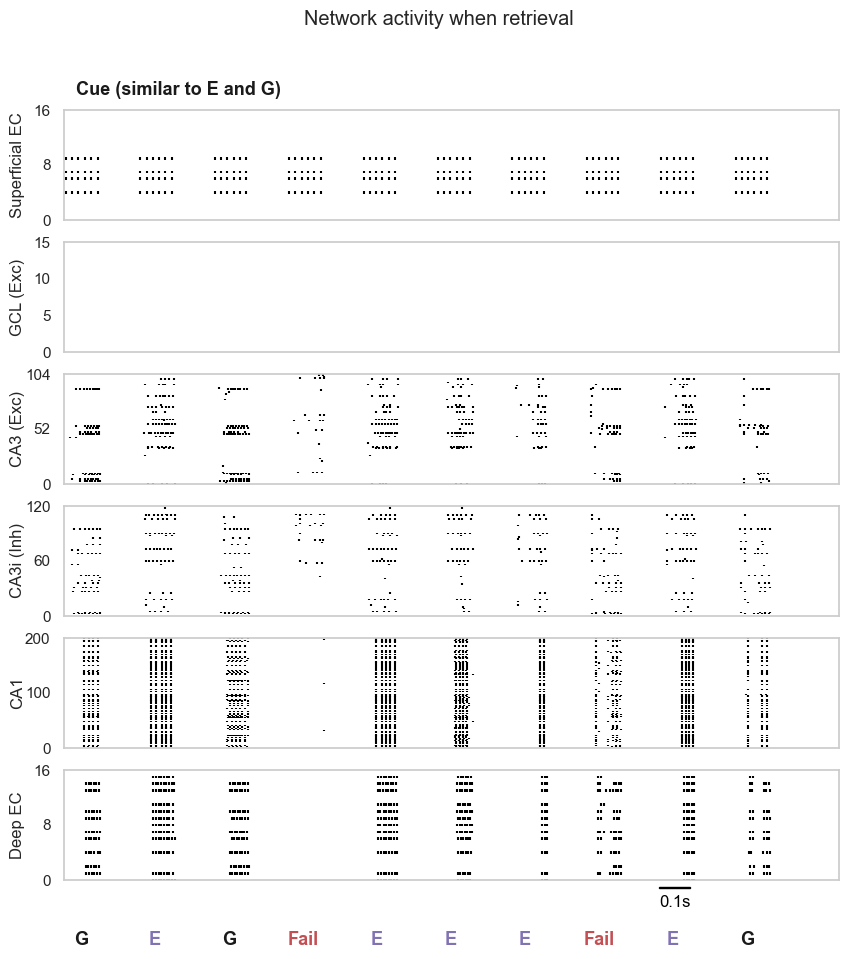

In [21]:
# Plotting
fig, axs = plt.subplots(6, 1, figsize=(10, 10), sharex=True)
fig.suptitle('Network activity when retrieval')

fig.text(0.24, 0.9, 'Cue (similar to E and G)', color='k', ha='center', va='center', fontsize=13, fontweight='bold')

# Adding text annotations for A and B inputs
labels = ['G', 'E', 'G', 'Fail', 'E', 'E', 'E', 'Fail', 'E', 'G']
color_map = ['k', 'm', 'k', 'r', 'm', 'm', 'm', 'r', 'm', 'k']
for n in range(10):
    fig.text(0.142+0.074*n, 0.05, labels[n], color=color_map[n], ha='center', va='center', fontsize=13, fontweight='bold')
    
plot_vlines(axs[0], In_FT_list, 'Superficial EC',16, 'black', 0.2, [0,8,16])
plot_vlines(axs[1], DG_FT_Flist, 'GCL (Exc)', len(DG_idx_set), 'black', 0.2, [0,5,10,15])
plot_vlines(axs[2], CA3_FT_Flist, 'CA3 (Exc)', len(CA3_idx_set), 'black', 0.8, [0,52,104])
plot_vlines(axs[3], CA3i_FT_list, 'CA3i (Inh)', 120, 'black', 0.8, [0,60,120])
plot_vlines(axs[4], CA1_FT_list, 'CA1', 200, 'black', 0.8, [0,100,200])
plot_vlines(axs[5], Out_FT_list, 'Deep EC', 16, 'black', 0.2, [0,8,16])

scalebar = AnchoredSizeBar(axs[-1].transData,
                           100, '0.1s', 'lower right', pad=0.1, sep=5,
                           color='black', frameon=False, bbox_to_anchor=(0.8125,-0.3), bbox_transform=axs[-1].transAxes, size_vertical=0.1)
axs[-1].add_artist(scalebar)

# x = np.array(range(0,2400-120))
# for n in range(10):
#     axs[6].plot(x, FR_matrix[n,:], color=color_map[n])
# axs[6].set_ylabel('CA3 activity (Hz)')
# axs[6].set_yticks([0,60,120])
# axs[6].grid(False)
plt.gca().axes.xaxis.set_visible(False)
plt.savefig('Spikes figure at retrieval_F.pdf', bbox_inches='tight')
plt.show()